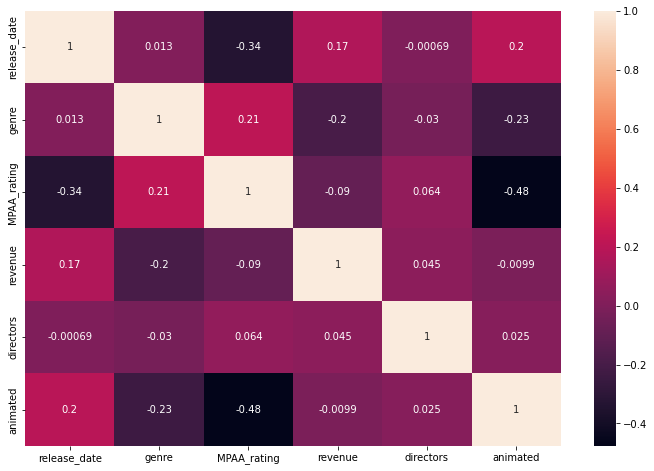

Mean Square Error Polynomial test =>  5.234668120655064e-14
Mean Square Error Polynomial train =>  6.116860699348927e-14
############################################################################################
Mean Square Error ridge test =>  525962560718315.56
Mean Square Error ridge train => 366224984297866.0


In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
           
    return X


data = pd.read_csv('datasets')

#data cleaning
data.dropna(how='any',inplace=True)
data['revenue'] = data['revenue'].str[1:].str.replace(',','').astype("float32").astype("int32")
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].view('int64')

cols=('movie_title','genre','MPAA_rating','directors', 'animated')
data = Feature_Encoder(data,cols)

X = data.iloc[:,0:] #Features
Y=data['revenue'] #Label

# Feature Selection
# Get the correlation between the features
movie_data = data.iloc[:,:]
corr = movie_data.corr()


top_feature = corr.index[abs(corr['revenue']) > 0.009]
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = movie_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(-1)
X = X[top_feature]

#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.40,shuffle=True,random_state=42)

poly_features = PolynomialFeatures(degree=2)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
prediction2 = poly_model.predict(poly_features.fit_transform(X_train))

print('Mean Square Error Polynomial test => ', metrics.mean_squared_error(y_test, prediction))
print('Mean Square Error Polynomial train => ', metrics.mean_squared_error(y_train, prediction2))
print("############################################################################################")


rdg = Ridge(alpha = 0.1 , normalize = True)
rdg.fit(X, Y)
prediction3 = rdg.predict(X_test)
print('Mean Square Error ridge test => ', metrics.mean_squared_error(y_test, prediction3))

prediction3 = rdg.predict(X_train)
print('Mean Square Error ridge train =>', metrics.mean_squared_error(y_train, prediction3))





(415, 7)


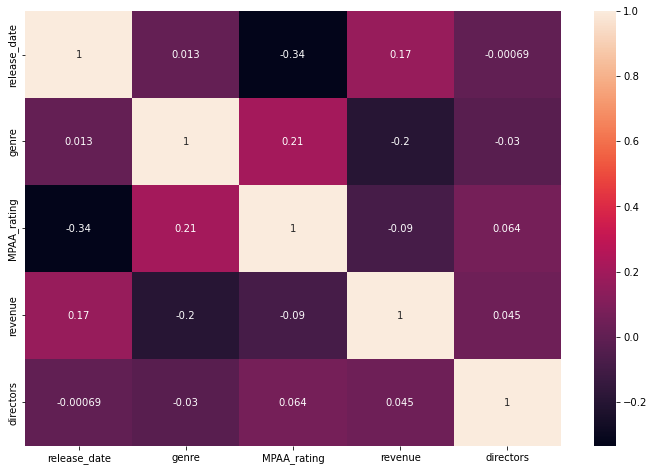

Index(['release_date', 'genre', 'MPAA_rating', 'revenue'], dtype='object')
Mean Square Error Polynomial test =>  9.961242005281375e-15
Mean Square Error Polynomial train =>  1.317637431560022e-14
############################################################################################
Mean Square Error ridge test =>  761636320103340.2
Mean Square Error ridge train => 346608315707132.6
Mean Square Error MLP =>  9.131974127022512e+16


/home/bvm/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder


def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
           
    return X


data = pd.read_csv('datasets/[ANIMATED]movie-revenues.csv')



#data cleaning
data.dropna(how='any',inplace=True)
data['revenue'] = data['revenue'].str[1:].str.replace(',','').astype("float32").astype("int32")
print(data.shape)
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].view('int64')

cols=('movie_title','genre','MPAA_rating','directors', 'animated')

data = Feature_Encoder(data,cols)

X = data.iloc[:,0:] #Features
Y=data['revenue'] #Label

# Feature Selection
# Get the correlation between the features
movie_data = data.iloc[:,:]
corr = movie_data.corr()


top_feature = corr.index[abs(corr['revenue']) > 0.01]
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = movie_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(-1)
print(top_feature)
X = X[top_feature]

#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=42)

poly_features = PolynomialFeatures(degree=1)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)



# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
prediction2 = poly_model.predict(poly_features.fit_transform(X_train))

print('Mean Square Error Polynomial test => ', metrics.mean_squared_error(y_test, prediction))
print('Mean Square Error Polynomial train => ', metrics.mean_squared_error(y_train, prediction2))
print("############################################################################################")


rdg = Ridge(alpha = 0.1 , normalize = True)
rdg.fit(X, Y)
prediction3 = rdg.predict(X_test)
print('Mean Square Error ridge test => ', metrics.mean_squared_error(y_test, prediction3))

prediction3 = rdg.predict(X_train)
print('Mean Square Error ridge train =>', metrics.mean_squared_error(y_train, prediction3))


regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)

pred = regr.predict(X_test)
print('Mean Square Error MLP => ', metrics.mean_squared_error(y_test, pred))

